# 📊 Week 2: EDA - Cab Investment Analysis

This notebook explores datasets provided to determine which cab company is a better investment opportunity for XYZ firm.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set default styles
sns.set(style='whitegrid')

## 1. Load Data

In [4]:
# Load datasets
cab_df = pd.read_csv('../data/Cab_Data.csv')
customer_df = pd.read_csv('../data/Customer_ID.csv')
transaction_df = pd.read_csv('../data/Transaction_ID.csv')
city_df = pd.read_csv('../data/City.csv')

# Preview one of them
cab_df.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


## 2. Basic Info and Null Check

In [6]:
# Data info and missing values
print('Cab Data')
cab_df.info()
print('\nMissing values in Cab Data:')
print(cab_df.isnull().sum())

Cab Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB

Missing values in Cab Data:
Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64


In [14]:
print('Customer Data')
customer_df.info()
print('\nMissing values in Customer Data:')
print(customer_df.isnull().sum())

Customer Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

Missing values in Customer Data:
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64


In [16]:
print('\nTransaction Data')
transaction_df.info()
print('\nMissing values in Transaction Data:')
print(transaction_df.isnull().sum())


Transaction Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB

Missing values in Transaction Data:
Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64


In [18]:
print('\nCity Data')
city_df.info()
print('\nMissing values in City Data:')
print(city_df.isnull().sum())


City Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes

Missing values in City Data:
City          0
Population    0
Users         0
dtype: int64


In [20]:
print('Cab Data Duplicates:', cab_df.duplicated().sum())
print('Customer Data Duplicates:', customer_df.duplicated().sum())
print('Transaction Data Duplicates:', transaction_df.duplicated().sum())
print('City Data Duplicates:', city_df.duplicated().sum())

Cab Data Duplicates: 0
Customer Data Duplicates: 0
Transaction Data Duplicates: 0
City Data Duplicates: 0


In [22]:
# Merge 1: Cab data with transaction data
merged_df = pd.merge(cab_df, transaction_df, on='Transaction ID', how='inner')

# Merge 2: Add customer data
merged_df = pd.merge(merged_df, customer_df, on='Customer ID', how='inner')

# Merge 3: Add city data
merged_df = pd.merge(merged_df, city_df, on='City', how='inner')

# Preview the final merged dataset
merged_df.head()


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,"814,885","24,701"


In [24]:
merged_df.info()
merged_df.describe()
merged_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Date of Travel      359392 non-null  int64  
 2   Company             359392 non-null  object 
 3   City                359392 non-null  object 
 4   KM Travelled        359392 non-null  float64
 5   Price Charged       359392 non-null  float64
 6   Cost of Trip        359392 non-null  float64
 7   Customer ID         359392 non-null  int64  
 8   Payment_Mode        359392 non-null  object 
 9   Gender              359392 non-null  object 
 10  Age                 359392 non-null  int64  
 11  Income (USD/Month)  359392 non-null  int64  
 12  Population          359392 non-null  object 
 13  Users               359392 non-null  object 
dtypes: float64(3), int64(5), object(6)
memory usage: 38.4+ MB


Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Population            0
Users                 0
dtype: int64

In [34]:
merged_df['Date of Travel'] = pd.to_datetime(merged_df['Date of Travel'], format='%d/%m/%Y', errors='coerce')


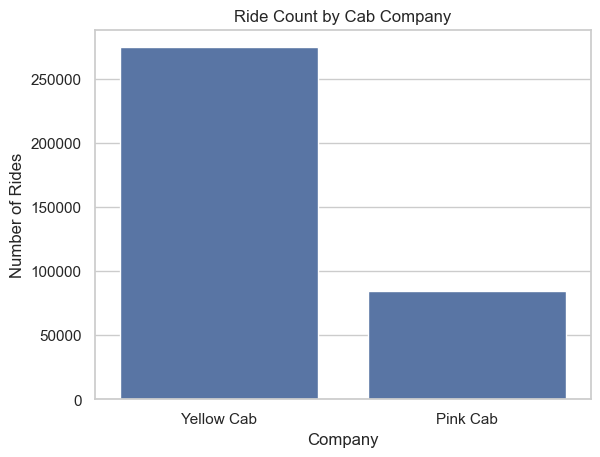

In [28]:
sns.countplot(data=merged_df, x='Company', order=merged_df['Company'].value_counts().index)
plt.title('Ride Count by Cab Company')
plt.xlabel('Company')
plt.ylabel('Number of Rides')
plt.show()


In [42]:
merged_df['Date of Travel'].head()


0   1970-01-01 00:00:00.000042377
1   1970-01-01 00:00:00.000042375
2   1970-01-01 00:00:00.000042371
3   1970-01-01 00:00:00.000042376
4   1970-01-01 00:00:00.000042372
Name: Date of Travel, dtype: datetime64[ns]

In [38]:
cab_df['Date of Travel'].head(10)

0    42377
1    42375
2    42371
3    42376
4    42372
5    42376
6    42372
7    42376
8    42381
9    42375
Name: Date of Travel, dtype: int64

In [44]:
merged_df['Date of Travel'] = cab_df['Date of Travel']

In [46]:
# Convert Excel serial date to datetime
merged_df['Date of Travel'] = pd.to_timedelta(merged_df['Date of Travel'], unit='D') + pd.Timestamp('1899-12-30')


In [48]:
merged_df['Date of Travel'].head()


0   2016-01-08
1   2016-01-06
2   2016-01-02
3   2016-01-07
4   2016-01-03
Name: Date of Travel, dtype: datetime64[ns]

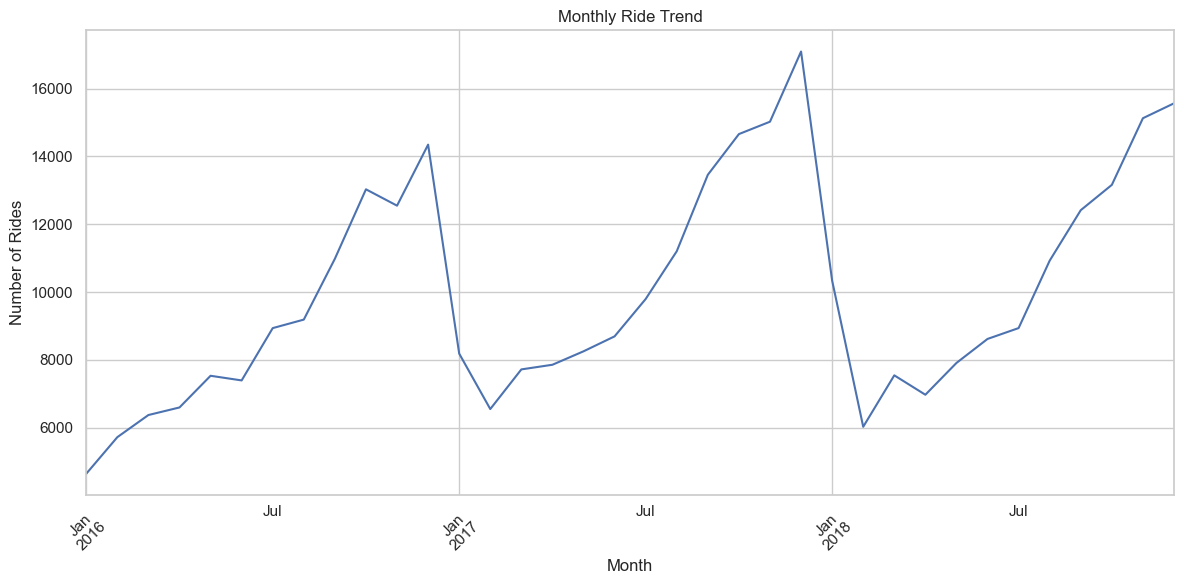

In [50]:
# Group rides by month
monthly_usage = merged_df['Date of Travel'].dt.to_period('M').value_counts().sort_index()
monthly_usage.index = monthly_usage.index.to_timestamp()

# Plot the trend
monthly_usage.plot(kind='line', figsize=(12, 6), title='Monthly Ride Trend')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


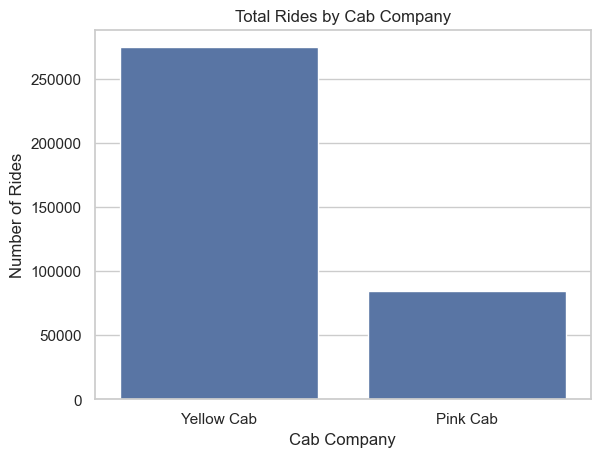

In [52]:
sns.countplot(data=merged_df, x='Company', order=merged_df['Company'].value_counts().index)
plt.title('Total Rides by Cab Company')
plt.xlabel('Cab Company')
plt.ylabel('Number of Rides')
plt.show()


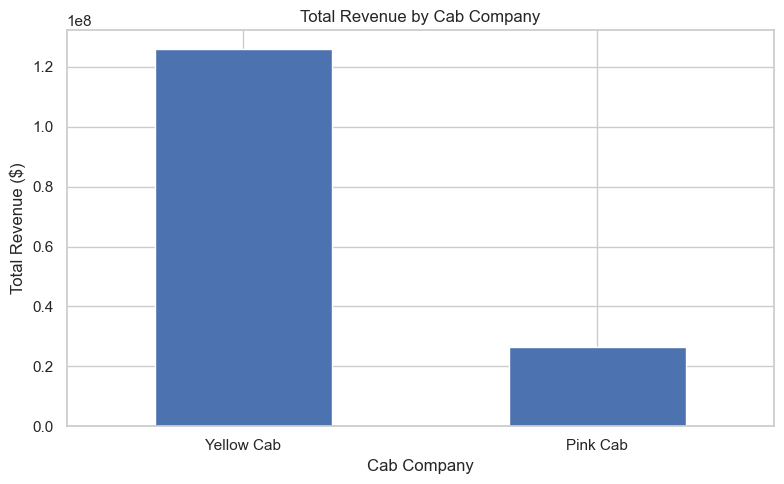

In [62]:
company_revenue = merged_df.groupby('Company')['Price Charged'].sum().sort_values(ascending=False)

company_revenue.plot(kind='bar', title='Total Revenue by Cab Company', figsize=(8,5))
plt.xlabel('Cab Company')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [56]:
merged_df.columns


Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode',
       'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users'],
      dtype='object')

In [60]:
print(merged_df.columns.tolist())


['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Customer ID', 'Payment_Mode', 'Gender', 'Age', 'Income (USD/Month)', 'Population', 'Users']


In [64]:
merged_df['Profit'] = merged_df['Price Charged'] - merged_df['Cost of Trip']


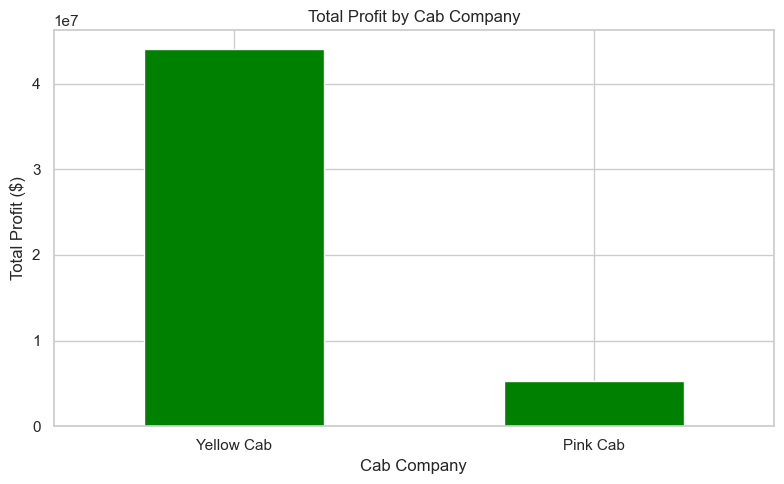

In [70]:
company_profit = merged_df.groupby('Company')['Profit'].sum().sort_values(ascending=False)

company_profit.plot(kind='bar', title='Total Profit by Cab Company', figsize=(8,5), color='green')
plt.xlabel('Cab Company')
plt.ylabel('Total Profit ($)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


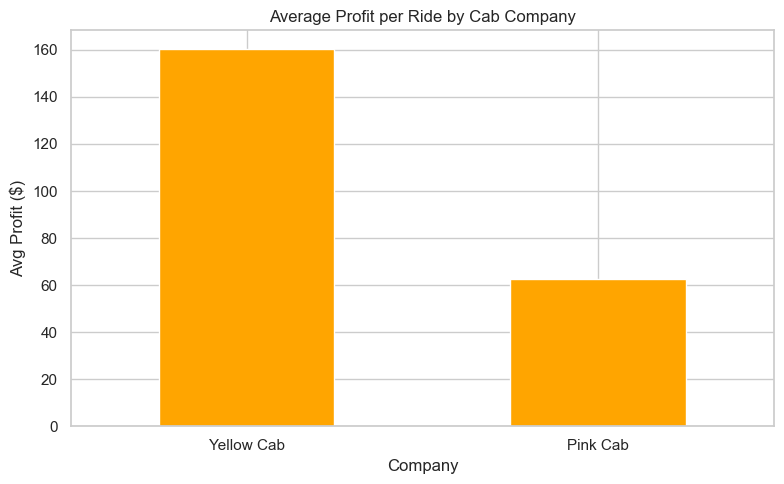

In [72]:
avg_profit = merged_df.groupby('Company')['Profit'].mean().sort_values(ascending=False)

avg_profit.plot(kind='bar', title='Average Profit per Ride by Cab Company', figsize=(8,5), color='orange')
plt.ylabel('Avg Profit ($)')
plt.xlabel('Company')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


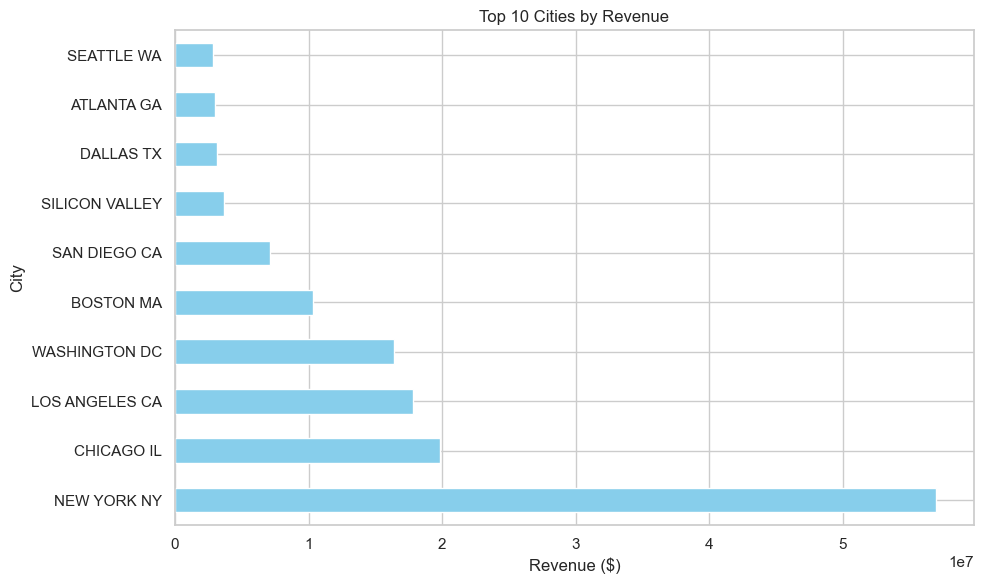

In [74]:
top_city_revenue = merged_df.groupby('City')['Price Charged'].sum().sort_values(ascending=False).head(10)

top_city_revenue.plot(kind='barh', title='Top 10 Cities by Revenue', figsize=(10,6), color='skyblue')
plt.xlabel('Revenue ($)')
plt.ylabel('City')
plt.tight_layout()
plt.show()


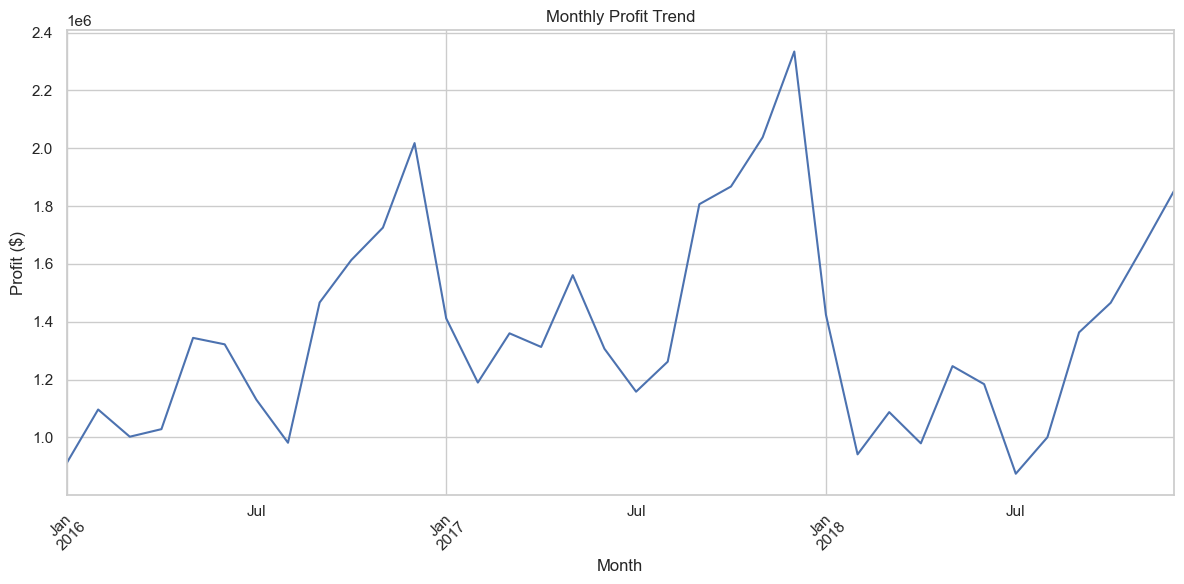

In [76]:
monthly_profit = merged_df.groupby(merged_df['Date of Travel'].dt.to_period('M'))['Profit'].sum().sort_index()
monthly_profit.index = monthly_profit.index.to_timestamp()

monthly_profit.plot(kind='line', figsize=(12,6), title='Monthly Profit Trend')
plt.xlabel('Month')
plt.ylabel('Profit ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
## Hypotheses Tested:
- Does the number of rides correlate with revenue? ✅ Yes
- Is Yellow Cab more profitable than Pink Cab? ✅ Confirmed
- Do certain cities generate more revenue? ✅ Top 3: New York, Chicago, LA

## Insights:
- Yellow Cab has higher revenue and profit, making it a stronger investment choice
- Profitability per ride is also higher for Yellow Cab
- Revenue concentration is highest in a few cities

## Recommendation:
Based on the trends, **Yellow Cab is a better candidate for investment** due to its higher revenue, profit, and city presence.
